# CNN 모델로 이미지 이름 예상하기

In [2]:
import numpy as np
from glob import glob
import cv2, os, random
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='NanumBarunGothic') 
from tensorflow.keras.preprocessing import image
import pandas as pd

In [3]:
names = [a.replace('./images/ani_','') for a in glob('./images/*.jpg')]
names = [a.replace('.jpg','') for a in names]

### 모델 불러오기

In [4]:
from tensorflow.keras.applications.vgg16 import VGG16, decode_predictions
from tensorflow.keras.applications.vgg19 import VGG19, decode_predictions
from tensorflow.keras.applications.resnet50 import ResNet50, decode_predictions
from tensorflow.keras.applications.inception_v3 import InceptionV3, decode_predictions
from tensorflow.keras.applications import ResNet101
vgg16 = VGG16()
vgg19 = VGG19()
resnet50 = ResNet50()
resnet101 = ResNet101()
inceptionv3 = InceptionV3(input_shape=(299,299,3))

### 모델 활용하기

In [5]:
from PIL import Image
v16_list =[]
for i, img_path in enumerate(glob('./images/*.jpg')):
  img = np.array(Image.open(img_path).resize((224, 224)))

  yhat = vgg16.predict(img.reshape(-1, 224, 224, 3))
  label_key = np.argmax(yhat)
  label = decode_predictions(yhat)
  label = label[0][0]
  v16_list.append(label[1])
  print('%s (%.2f%%)' % (label[1], label[2]*100), names[i])

gorilla (84.76%) 고릴라
frilled_lizard (99.73%) 목도리도마뱀
baboon (68.28%) 원숭이
piggy_bank (27.54%) 돼지
English_springer (31.56%) 개
tiger (85.69%) 호랑이
Angora (77.53%) 토끼옷입은고양이
fur_coat (54.31%) 펭귄
Egyptian_cat (70.01%) 고양이
coyote (37.48%) 고라니
beaver (64.28%) 비버
jay (53.59%) 벌매
Chihuahua (68.53%) 토끼
hyena (91.61%) 하이에나
albatross (77.69%) 알바트로스
ox (52.35%) 말
otter (63.78%) 수달
toucan (99.30%) 큰부리새
hare (82.67%) 키위새
impala (43.89%) 순록
jay (34.34%) 참새
bald_eagle (66.71%) 독수리
black_stork (61.76%) 군함조
bison (49.92%) 들소
macaque (45.35%) 침팬치
crane (40.16%) 물총새
sulphur-crested_cockatoo (99.39%) 앵무새
little_blue_heron (84.84%) 무수리
great_white_shark (61.30%) 혹등고래
wolf_spider (88.45%) 땅늑대거미


In [6]:
v19_list =[]
for i, img_path in enumerate(glob('./images/*.jpg')):
  img = np.array(Image.open(img_path).resize((224, 224)))

  yhat = vgg19.predict(img.reshape(-1, 224, 224, 3))
  label_key = np.argmax(yhat)
  label = decode_predictions(yhat)
  label = label[0][0]
  v19_list.append(label[1])
  print('%s (%.2f%%)' % (label[1], label[2]*100), names[i])

standard_poodle (15.74%) 고릴라
frilled_lizard (99.79%) 목도리도마뱀
macaque (21.37%) 원숭이
piggy_bank (51.51%) 돼지
Border_collie (29.36%) 개
tiger (75.43%) 호랑이
Angora (83.25%) 토끼옷입은고양이
fur_coat (65.73%) 펭귄
tabby (73.15%) 고양이
impala (63.63%) 고라니
otter (25.96%) 비버
indigo_bunting (76.11%) 벌매
Angora (35.42%) 토끼
hyena (85.33%) 하이에나
albatross (97.25%) 알바트로스
ox (66.08%) 말
otter (41.46%) 수달
toucan (98.86%) 큰부리새
beaver (20.58%) 키위새
bighorn (39.57%) 순록
junco (68.60%) 참새
bald_eagle (55.13%) 독수리
black_stork (34.74%) 군함조
African_elephant (35.72%) 들소
baboon (44.77%) 침팬치
European_gallinule (41.22%) 물총새
sulphur-crested_cockatoo (95.52%) 앵무새
little_blue_heron (45.52%) 무수리
great_white_shark (65.81%) 혹등고래
wolf_spider (88.09%) 땅늑대거미


In [7]:
resnet50_list =[]
for i, img_path in enumerate(glob('./images/*.jpg')):
  img = cv2.imread(img_path, -1)
  img = cv2.resize(img, (224, 224))
  yhat = resnet50.predict(img.reshape(-1, 224, 224, 3))
  label = decode_predictions(yhat)
  label = label[0][0]
  resnet50_list.append(label[1])
  print('%s (%.2f%%)' % (label[1], label[2]*100), names[i])

gorilla (97.45%) 고릴라
frilled_lizard (100.00%) 목도리도마뱀
macaque (59.01%) 원숭이
candle (49.22%) 돼지
Saint_Bernard (32.28%) 개
tiger (85.64%) 호랑이
Persian_cat (19.48%) 토끼옷입은고양이
safety_pin (32.28%) 펭귄
tiger_cat (45.10%) 고양이
hare (71.14%) 고라니
beaver (60.96%) 비버
brambling (42.80%) 벌매
wood_rabbit (36.49%) 토끼
hyena (99.47%) 하이에나
albatross (80.71%) 알바트로스
sorrel (96.25%) 말
otter (85.59%) 수달
toucan (99.08%) 큰부리새
prairie_chicken (33.91%) 키위새
bighorn (39.96%) 순록
brambling (83.15%) 참새
bald_eagle (99.67%) 독수리
goose (40.91%) 군함조
bison (92.79%) 들소
chimpanzee (99.62%) 침팬치
dhole (19.85%) 물총새
hummingbird (14.46%) 앵무새
limpkin (98.76%) 무수리
great_white_shark (40.93%) 혹등고래
barn_spider (80.87%) 땅늑대거미


In [8]:
resnet101_list =[]
for i, img_path in enumerate(glob('./images/*.jpg')):
  img = cv2.imread(img_path, -1)
  img = cv2.resize(img, (224, 224))
  yhat = resnet101.predict(img.reshape(-1, 224, 224, 3))
  label = decode_predictions(yhat)
  label = label[0][0]
  resnet101_list.append(label[1])
  print('%s (%.2f%%)' % (label[1], label[2]*100), names[i])

gorilla (58.98%) 고릴라
frilled_lizard (100.00%) 목도리도마뱀
macaque (83.55%) 원숭이
piggy_bank (87.55%) 돼지
Tibetan_terrier (27.42%) 개
tiger (93.46%) 호랑이
Angora (74.63%) 토끼옷입은고양이
safety_pin (73.65%) 펭귄
tiger_cat (50.81%) 고양이
gazelle (65.31%) 고라니
beaver (83.30%) 비버
brambling (49.31%) 벌매
hare (59.46%) 토끼
hyena (97.57%) 하이에나
albatross (95.57%) 알바트로스
sorrel (98.55%) 말
otter (96.80%) 수달
toucan (99.87%) 큰부리새
echidna (62.40%) 키위새
gazelle (36.45%) 순록
brambling (83.53%) 참새
bald_eagle (99.56%) 독수리
goose (39.51%) 군함조
bison (98.86%) 들소
chimpanzee (82.69%) 침팬치
bittern (33.96%) 물총새
sulphur-crested_cockatoo (5.65%) 앵무새
limpkin (41.42%) 무수리
grey_whale (39.03%) 혹등고래
wolf_spider (51.37%) 땅늑대거미


In [9]:
inceptionv3_list =[]
for i, img_path in enumerate(glob('./images/*.jpg')):
  img = cv2.imread(img_path, -1)
  img = cv2.resize(img, (299, 299))
  yhat = inceptionv3.predict(img.reshape(-1, 299, 299, 3))
  label = decode_predictions(yhat)
  label = label[0][0]
  inceptionv3_list.append(label[1])
  print('%s (%.2f%%)' % (label[1], label[2]*100), names[i])

pitcher (100.00%) 고릴라
flatworm (100.00%) 목도리도마뱀
pitcher (100.00%) 원숭이
web_site (100.00%) 돼지
pitcher (100.00%) 개
flatworm (99.97%) 호랑이
pitcher (100.00%) 토끼옷입은고양이
clog (100.00%) 펭귄
saltshaker (84.81%) 고양이
pitcher (99.78%) 고라니
saltshaker (100.00%) 비버
pitcher (99.99%) 벌매
pitcher (100.00%) 토끼
flatworm (59.75%) 하이에나
pitcher (100.00%) 알바트로스
pitcher (95.45%) 말
pitcher (100.00%) 수달
pitcher (100.00%) 큰부리새
saltshaker (85.10%) 키위새
pitcher (98.92%) 순록
pitcher (100.00%) 참새
pitcher (88.93%) 독수리
flatworm (100.00%) 군함조
pitcher (100.00%) 들소
pitcher (100.00%) 침팬치
flatworm (94.08%) 물총새
clog (100.00%) 앵무새
web_site (99.88%) 무수리
pitcher (100.00%) 혹등고래
flatworm (100.00%) 땅늑대거미


In [10]:
res_df = pd.DataFrame({
    '원본' : names,
    'VGGNet 16' : v16_list,
    'VGGNet 19' : v19_list,
    'RestNet50' : resnet50_list,
    'RestNet101' : resnet101_list,
    'Inception v3' : inceptionv3_list
})

In [11]:
res_df

,원본,VGGNet 16,VGGNet 19,RestNet50,RestNet101,Inception v3
0,고릴라,gorilla,standard_poodle,gorilla,gorilla,pitcher
1,목도리도마뱀,frilled_lizard,frilled_lizard,frilled_lizard,frilled_lizard,flatworm
2,원숭이,baboon,macaque,macaque,macaque,pitcher
3,돼지,piggy_bank,piggy_bank,candle,piggy_bank,web_site
4,개,English_springer,Border_collie,Saint_Bernard,Tibetan_terrier,pitcher
5,호랑이,tiger,tiger,tiger,tiger,flatworm
6,토끼옷입은고양이,Angora,Angora,Persian_cat,Angora,pitcher
7,펭귄,fur_coat,fur_coat,safety_pin,safety_pin,clog
8,고양이,Egyptian_cat,tabby,tiger_cat,tiger_cat,saltshaker
9,고라니,coyote,impala,hare,gazelle,pitcher


### 사용한 사진들

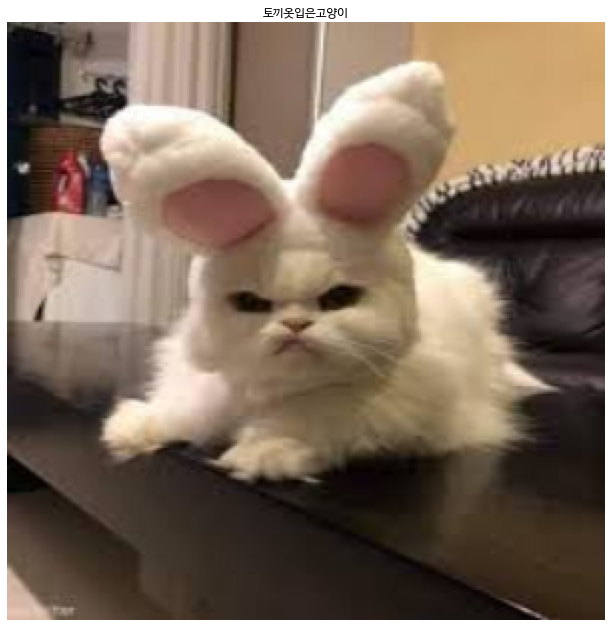

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
img = cv2.imread('/content/images/ani_토끼옷입은고양이.jpg', -1)
img = cv2.resize(img, (299, 299))
img = img[:,:,::-1]
plt.figure(figsize=(11,11))
plt.imshow(img)
plt.axis("off")
plt.title('토끼옷입은고양이')
plt.show()

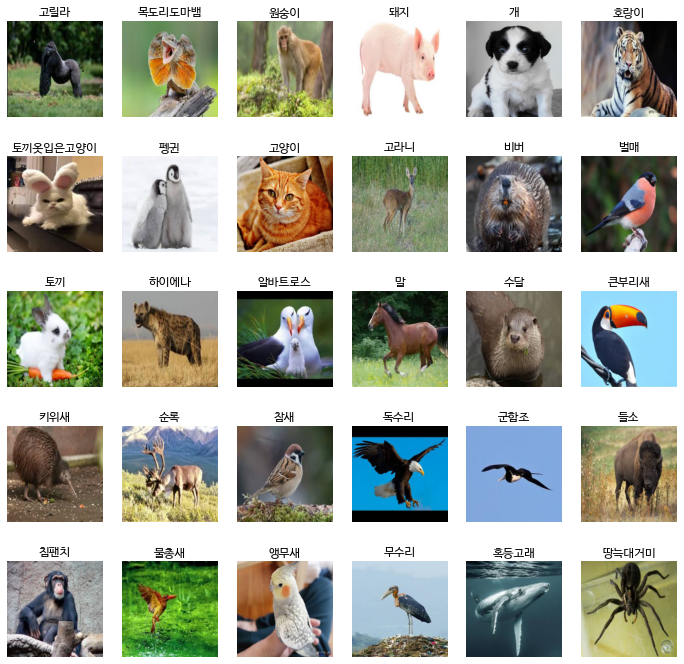

In [13]:
plt.figure(figsize=(12,12))
for i, img_path in enumerate(glob('./images/*.jpg')):
  img = cv2.imread(img_path, -1)
  img = cv2.resize(img, (299, 299))
  plt.subplot(5, 6, i+1)
  img = img[:,:,::-1]
  plt.imshow(img)
  plt.axis('off')
  plt.title(names[i])
plt.show()